# Modelo de Arbol de Decisión

# Cargar y analizar los datos

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


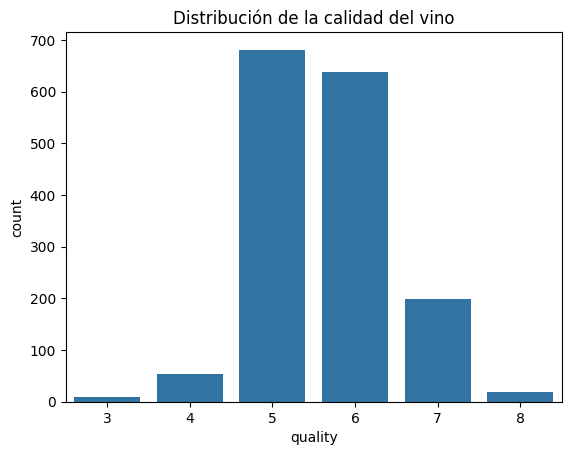

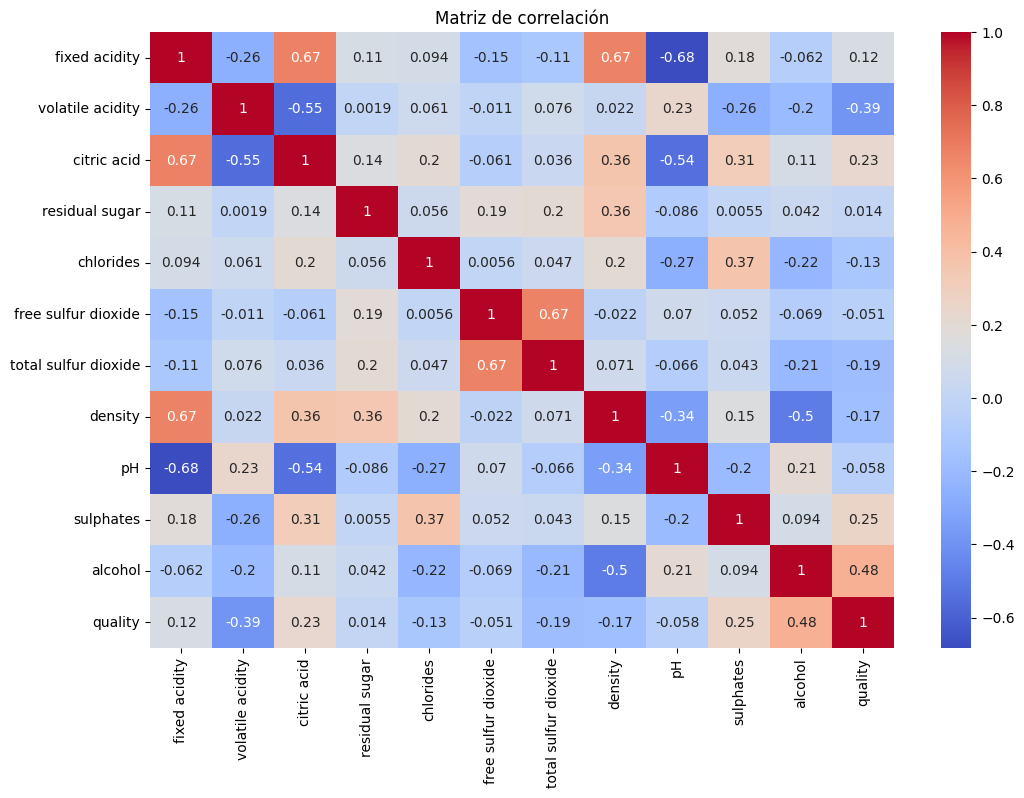

In [3]:
# Importar las librerías necesarias
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.impute import SimpleImputer

# Cargar el dataset
file_path = 'winequality-red.csv'
data = pd.read_csv(file_path)

# Mostrar las primeras filas del dataset
data.head()

# Información básica del dataset
data.info()

# Resumen estadístico del dataset
data.describe()

# Verificar la cantidad de valores nulos
data.isnull().sum()

# Visualizar la distribución de las clases (calidad del vino)
sns.countplot(x='quality', data=data)
plt.title("Distribución de la calidad del vino")
plt.show()

# Correlación entre las variables
plt.figure(figsize=(12,8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title("Matriz de correlación")
plt.show()


# Preprocesar los datos

In [7]:
# Imputar los valores faltantes con la media (si existen)
imputer = SimpleImputer(strategy='mean')
data_cleaned = pd.DataFrame(imputer.fit_transform(data), columns=data.columns)

# No escalar la variable 'quality'
X = data_cleaned.drop('quality', axis=1)  # Solo las características
y = data_cleaned['quality'].astype(int)    # Variable objetivo, asegurarse de que sea entera

# Normalizar las características (sin incluir la columna 'quality')
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)



 # Selección de características

In [8]:
# Selección de las mejores características usando chi2
selector = SelectKBest(score_func=chi2, k=5)
X_new = selector.fit_transform(X_scaled, y)  # Asegurarse de usar y con valores enteros

# Mostrar las puntuaciones de las características
feature_scores = pd.DataFrame(selector.scores_, columns=['Score'], index=X.columns)
print(feature_scores.sort_values(by='Score', ascending=False))




                          Score
alcohol               36.803074
volatile acidity      13.811468
citric acid           13.025665
total sulfur dioxide  11.180614
sulphates              5.474665
density                2.525748
free sulfur dioxide    2.434120
fixed acidity          2.228891
chlorides              1.455875
pH                     0.706011
residual sugar         0.437516


# Dividir el dataset en entrenamiento y prueba

In [9]:
# Dividir el dataset en conjuntos de entrenamiento y prueba (80% entrenamiento, 20% prueba)
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.2, random_state=42)

# Verificar las formas de los conjuntos
print(f'X_train shape: {X_train.shape}')
print(f'X_test shape: {X_test.shape}')


X_train shape: (1279, 5)
X_test shape: (320, 5)


# Entrenar el modelo de árbol de decisión

In [10]:
# Crear el modelo de árbol de decisión
model = DecisionTreeClassifier(random_state=42)

# Ajustar el modelo con los datos de entrenamiento
model.fit(X_train, y_train)

# Predecir los resultados en el conjunto de prueba
y_pred = model.predict(X_test)


# Evaluar el desempeño del modelo

In [11]:
# Evaluación del modelo con métricas
print("Matriz de confusión:")
print(confusion_matrix(y_test, y_pred))

print("\nReporte de clasificación:")
print(classification_report(y_test, y_pred))

print("\nPrecisión del modelo:")
print(f'{accuracy_score(y_test, y_pred)*100:.2f}%')


Matriz de confusión:
[[ 0  0  0  1  0  0]
 [ 1  0  6  2  1  0]
 [ 2  1 92 32  3  0]
 [ 0  2 33 75 20  2]
 [ 0  1  5 13 22  1]
 [ 0  0  0  3  2  0]]

Reporte de clasificación:
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00        10
           5       0.68      0.71      0.69       130
           6       0.60      0.57      0.58       132
           7       0.46      0.52      0.49        42
           8       0.00      0.00      0.00         5

    accuracy                           0.59       320
   macro avg       0.29      0.30      0.29       320
weighted avg       0.58      0.59      0.59       320


Precisión del modelo:
59.06%


# Visualización de resultados

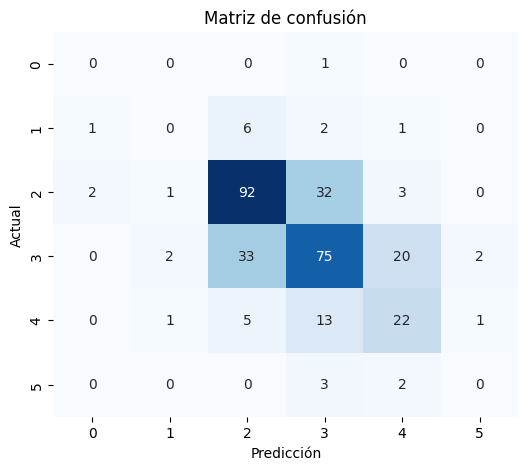

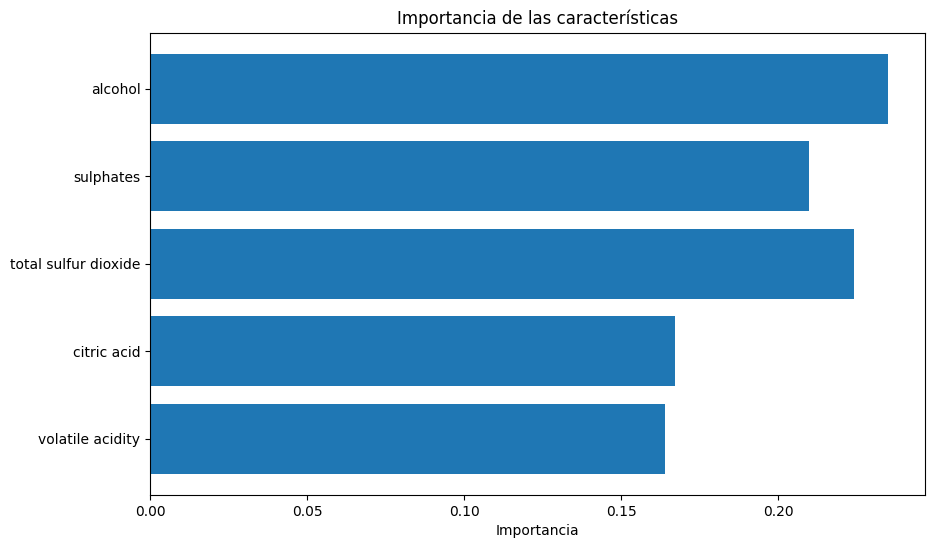

In [12]:
# Visualizar la matriz de confusión usando un heatmap
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,5))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap='Blues', cbar=False)
plt.title("Matriz de confusión")
plt.ylabel("Actual")
plt.xlabel("Predicción")
plt.show()

# Visualizar la importancia de las características en el árbol de decisión
plt.figure(figsize=(10,6))
plt.barh(X.columns[selector.get_support()], model.feature_importances_)
plt.title("Importancia de las características")
plt.xlabel("Importancia")
plt.show()
